# Exploring Ebay Car Sales

This project should provide the opportunity to showcase a basic understanding of the pandas and numpy libraries. I will use my knowledge of these two libraries to demonstrate the following abilities:
* cleaning both text and numerical data
* indexing and manipulation of dataframe and series objects
* working understanding of many of the functions and methods available in both libraries

The dataset I will be exploring is from Dataquest.io, but it originally appeared on Kaggle. The Dataquest file is an intentionally-dirtied and randomly-sampled subset of the original file, which can be found [here](https://www.kaggle.com/orgesleka/used-cars-database/data).

In [340]:
import numpy as np
import pandas as pd
#imports the pandas and numpy libraries

In [341]:
autos = pd.read_csv('autos.csv', encoding = "Latin-1")
#reads the .csv file in as a pandas dataframe

In [342]:
autos.head()
#displays the first five rows of the autos dataframe

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [343]:
autos.info()
#displays important info about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

The **`.info()`** method shows us that we have 20 columns and 50000 rows, but many of our columns have null cells. Only 5 of our columns are the integer type, while the rest are currently objects. 

In [344]:
autos.columns
#displays the array of existing column names

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [345]:
copy_cols = autos.columns.copy()
#creates a copy of the columns array

In [346]:
name_dictionary = {'dateCrawled':'date_crawled', 'name':'name', 'seller':'seller', 'offerType':'offer_type', 'price':'price', 'abtest':'ab_test',
       'vehicleType': 'vehicle_type', 'yearOfRegistration': 'registration_year', 'gearbox': 'gearbox', 'powerPS':'power_ps', 'model':'model',
       'odometer':'odometer', 'monthOfRegistration': 'registration_month', 'fuelType': 'fuel_type', 'brand':'brand',
       'notRepairedDamage':'unrepaired_damage', 'dateCreated':'ad_created', 'nrOfPictures':'number_of_pictures', 'postalCode':'postal_code',
       'lastSeen':'last_seen'}
#created a dictionary of column name changes
copy_cols = copy_cols.map(name_dictionary)
#mapped dictionary onto copy of columns
autos.columns = copy_cols
#replaced columns with edited copy

The first step to cleaning up the data is creating intuitive, consistent column names. Above, I renamed some of the columns to make them more descriptive and intuitive, and I ensured that snakecase was consistently applied to all column names.

In [347]:
autos.describe(include = 'all')
#returns descriptive stats for all columns

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,number_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-23 19:38:20,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Looking at the descriptive statistics, we can determine that:<br> <br>Our **`seller`** & **`offer_type`** columns both have only a couple unique entries, and the vast majority of entries (all but one) are identical. These can likely be dropped, along with **`number_of_pictures`**, which has no meaningful data due to a bug in the crawler.<br> <br>The **`date_crawled`**, **`last_seen`** and **`ad_created`** columns could be converted to a datetime type, if we end up needing them.<br> <br>For **`vehicle_type`**, **`fuel_type`**, **`brand`**, and **`model`**, we'll need to ensure consistent naming practices to make sure we're catching every instance of each type of car.<br> <br>It seems suspicious that the most common **`price`** was $0, and we'll need to convert it to a float in order to get more meaningful stats from that column.<br> <br>Also suspicious are **`registration_year`**, which has a minimum value of 1000, and **`registration_month`**, which has a minimum value of 0.<br> <br>**`odometer`** will also need to be converted to a float before we can get meaningful stats out of it.

In [348]:
autos = autos.drop(columns=['seller', 'offer_type', 'number_of_pictures'])
#drops the columns without meaningful data

In [349]:
autos['date_crawled'] = pd.to_datetime(autos['date_crawled'],format= '%Y-%m-%d %H:%M:%S')
autos['last_seen'] = pd.to_datetime(autos['last_seen'],format= '%Y-%m-%d %H:%M:%S')
autos['ad_created'] = pd.to_datetime(autos['ad_created'],format= '%Y-%m-%d %H:%M:%S')
#converts the columns with timestamps to a datetime type

In [350]:
autos['vehicle_type'].unique()
#vehicle_type has consistent naming

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

In [351]:
autos['fuel_type'].unique()
#fuel_type is also consistent

array(['lpg', 'benzin', 'diesel', nan, 'cng', 'hybrid', 'elektro',
       'andere'], dtype=object)

In [352]:
autos['brand'].unique()
#brand is consistent

array(['peugeot', 'bmw', 'volkswagen', 'smart', 'ford', 'chrysler',
       'seat', 'renault', 'mercedes_benz', 'audi', 'sonstige_autos',
       'opel', 'mazda', 'porsche', 'mini', 'toyota', 'dacia', 'nissan',
       'jeep', 'saab', 'volvo', 'mitsubishi', 'jaguar', 'fiat', 'skoda',
       'subaru', 'kia', 'citroen', 'chevrolet', 'hyundai', 'honda',
       'daewoo', 'suzuki', 'trabant', 'land_rover', 'alfa_romeo', 'lada',
       'rover', 'daihatsu', 'lancia'], dtype=object)

In [353]:
autos['model'].unique()
#model naming conventions are also consistent

array(['andere', '7er', 'golf', 'fortwo', 'focus', 'voyager', 'arosa',
       'megane', nan, 'a3', 'clio', 'vectra', 'scirocco', '3er', 'a4',
       '911', 'cooper', '5er', 'polo', 'e_klasse', '2_reihe', 'c_klasse',
       'corsa', 'mondeo', 'altea', 'a1', 'twingo', 'a_klasse', 'cl',
       '3_reihe', 's_klasse', 'sandero', 'passat', 'primera', 'fiesta',
       'wrangler', 'clubman', 'a6', 'transporter', 'astra', 'v40',
       'ibiza', 'micra', '1er', 'yaris', 'colt', '6_reihe', '5_reihe',
       'corolla', 'ka', 'tigra', 'punto', 'vito', 'cordoba', 'galaxy',
       '100', 'sharan', 'octavia', 'm_klasse', 'lupo', 'superb', 'meriva',
       'c_max', 'laguna', 'touran', '1_reihe', 'm_reihe', 'touareg',
       'seicento', 'avensis', 'vivaro', 'x_reihe', 'ducato', 'carnival',
       'boxster', 'signum', 'zafira', 'rav', 'a5', 'beetle', 'c_reihe',
       'phaeton', 'i_reihe', 'sl', 'insignia', 'up', 'civic', '80',
       'mx_reihe', 'omega', 'sorento', 'z_reihe', 'berlingo', 'clk',
       '

In [354]:
autos['price'] = autos['price'].str.replace("$","")
autos['price'] = autos['price'].str.replace(",","")
autos['price'] = autos['price'].astype(float)
#converts our price column to a float type

In [355]:
autos['price'].describe()
#gives descriptive stats for price column

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

Now that we have **`price`** as a float, we can look at some stats. Just looking at the mean and median, we can see that some high prices are skewing our mean, and we can confirm this fact with our maximum value of one hundred million dollars. We need to cut outlier rows. We'll keep the ones priced at $0 as these might be trades or auctions. 

# of unique prices: (2357,)
AxesSubplot(0.125,0.125;0.775x0.755)


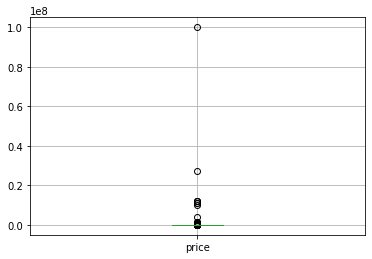

In [356]:
print('# of unique prices:', autos['price'].unique().shape)
#returns the shape of the array of unique values for price
print(autos['price'].plot.box(grid=True))
#creates a boxplot of the price column

Examining the boxplot, we can see that some of our higher numbers are very far outside the expected range. What's it look like if we get rid of anything over 350 thousand (the highest sale price for a car over Ebay last year)?

AxesSubplot(0.125,0.125;0.775x0.755)


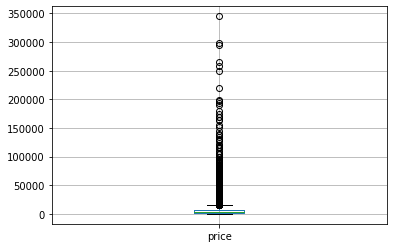

In [357]:
autos = autos.loc[autos['price']<350000,:]
#removes rows with prices over $350,000
print(autos['price'].plot.box(grid=True))
#prints the new boxplot

In [358]:
autos['price'].describe()
#shows the descriptive stats now that we've removed some of the more egregious outliers

count     49985.000000
mean       5714.637531
std        8850.742575
min           0.000000
25%        1100.000000
50%        2950.000000
75%        7200.000000
max      345000.000000
Name: price, dtype: float64

Prices often have a lot of skew because of floor effects, and here it's no different. But at least now we're working with plausible numbers. Looking back at our last round of descriptive stats, you can see that removing these outliers almost halved our mean.

In [359]:
autos['registration_year'] = autos['registration_year'].astype(int)
#converts registration_year column to an integer type

In [360]:
autos['registration_year'].describe()
#gives descriptive states for registration_year column

count    49985.000000
mean      2005.075503
std        105.728207
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

Our **`registration_year`** column also has some outliers, and we'll need to re-assign these rows as nan to keep them from throwing off our stats.

In [361]:
print('last ad created on:', autos['ad_created'].max())
print('first ad created on:', autos['ad_created'].min())

last ad created on: 2016-04-07 00:00:00
first ad created on: 2015-06-11 00:00:00


We know from our **`ad_created`** column that our ads were all created in 2015 and 2016. Since car registrations last up to three years max, we only care if the registration was between 2012 and 2016. Numbers above this range are not possible, and below are irrelevant. 

In [362]:
autos.loc[(autos['registration_year'] > 2016),['registration_year']] = np.nan
autos.loc[(autos['registration_year'] < 2012),['registration_year']] = np.nan
#sets all rows equal outside our range to nan in the registration_year column
autos['registration_year'].describe()
#shows our descriptive stats for the column after changes

count    4508.000000
mean     2013.906167
std         1.612390
min      2012.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2016.000000
Name: registration_year, dtype: float64

In [363]:
autos['registration_month'] = autos['registration_month'].astype(int)
#converts registration_month column to an integer type

In [364]:
autos['registration_month'].describe()
#gives descriptive stats for registration_month column

count    49985.000000
mean         5.723777
std          3.711856
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: registration_month, dtype: float64

Since there is no month 0, we want to replace these entries in our **`registration_month`** column with nan, so we can still run stats. 

In [365]:
autos.loc[(autos['registration_month'] == 0),['registration_month']] = np.nan
#re-assigns all 0s to nan in our registration_month column
autos['registration_month'].describe()
#shows the descriptive stats for the edited registration_month column

count    44912.000000
mean         6.370302
std          3.348959
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: registration_month, dtype: float64

In [366]:
autos['odometer'] = autos['odometer'].str.replace(",","")
autos['odometer'] = autos['odometer'].str.replace("km","")
autos.rename(columns={'odometer':'odometer_km'}, inplace=True)
autos['odometer_km'] = autos['odometer_km'].astype(float)
#converts odometer column to float type and changes name to odometer_km

In [367]:
autos['odometer_km'].describe()

count     49985.000000
mean     125738.921677
std       40034.891684
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

Looking at the stats for **`odometer_km`**, we can see something fishy is happening, since our median and 75th percentile are the same. We'll need to investigate this further. 

AxesSubplot(0.125,0.125;0.775x0.755)


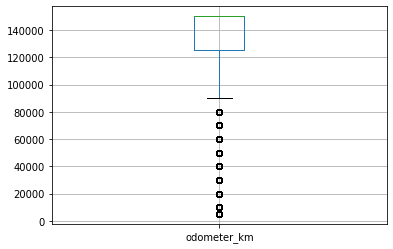

In [368]:
print(autos['odometer_km'].plot.box(grid=True))

We appear to have a ceiling effect at 150,000 km. This may result from a dropdown box that only goes that high, or some other artifact of how the data was first collected. We'll need to keep this in mind moving forward.

Now that we've cleaned the data up a bit and got it in a more manageable form, we can start to draw insights from it. Let's start by looking at avg. price for the top ten brands.